# Load the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You can find the data under https://drive.google.com/drive/folders/1e550az93U3_kfRBbVY5PZnMKYwGYmHqi?usp=sharing

import pandas as pd
import numpy as np

train_data =pd.read_csv( "/content/drive/My Drive/HW1/train_data.csv")
train_label =pd.read_csv( "/content/drive/My Drive/HW1/train_label.csv")
test_data = pd.read_csv( "/content/drive/My Drive/HW1/test_data.csv")
test_label = pd.read_csv( "/content/drive/My Drive/HW1/test_label.csv")

In [3]:
# show random samples from the training data
train_data.head()

# One line of code

,id,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,f_worker,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes
0,1,6,1169,4,4,67,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
1,2,48,5951,2,2,22,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0
2,3,12,2096,2,3,49,1,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0
3,4,42,7882,2,4,45,1,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0
4,5,24,4870,3,4,53,2,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0


In [6]:
train_label


,label
0,1
1,0
2,1
3,1
4,0
...,...
788,0
789,0
790,0
791,1


In [7]:
test_label

,label
0,1
1,1
2,1
3,0
4,1
...,...
202,1
203,1
204,1
205,0


# Train Decision Tree with default parameters

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',)
clf = clf.fit(train_data, train_label)

# Estimate the prediction of test data
test_pred = clf.predict(test_data)

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc =accuracy_score(test_label, test_pred)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 67.63285%


# FineTune Decision Tree parameters

1- Spliting dataset into train and validation 

In [0]:

# Split training data to 70% training and 30% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data,train_label,test_size=0.3)

2- FineTune minimum sample split

mss 2 // accuracy =  0.7016806722689075
mss 3 // accuracy =  0.6680672268907563
mss 4 // accuracy =  0.6848739495798319
mss 5 // accuracy =  0.6722689075630253
mss 6 // accuracy =  0.6680672268907563
mss 7 // accuracy =  0.6764705882352942
mss 8 // accuracy =  0.6722689075630253
mss 9 // accuracy =  0.6764705882352942
mss 10 // accuracy =  0.6680672268907563
mss 11 // accuracy =  0.6764705882352942
mss 12 // accuracy =  0.680672268907563
mss 13 // accuracy =  0.6764705882352942
mss 14 // accuracy =  0.6722689075630253
mss 15 // accuracy =  0.6680672268907563
mss 16 // accuracy =  0.6932773109243697
mss 17 // accuracy =  0.7058823529411765
mss 18 // accuracy =  0.6932773109243697
mss 19 // accuracy =  0.7142857142857143
mss 20 // accuracy =  0.7184873949579832
mss 21 // accuracy =  0.7142857142857143
mss 22 // accuracy =  0.7058823529411765
mss 23 // accuracy =  0.7100840336134454
mss 24 // accuracy =  0.7058823529411765
mss 25 // accuracy =  0.7058823529411765
mss 26 // accuracy =  0.6

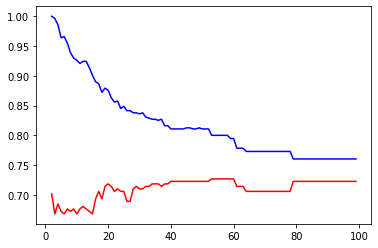

In [10]:
min_samples_splits = range(2, 100)

train_results = []
val_results = []
for mss in min_samples_splits:
  
  # Fit the tree using the 70% portion of the training data
  dt=DecisionTreeClassifier(min_samples_split=mss ,criterion='entropy')
  dt.fit(x_train, y_train)
  # One line of code
  # One line of code
  
  # Evaluate on Training set
  train_pred =dt.predict(x_train) # One line of code
  train_acc =accuracy_score(y_train,train_pred) # One line of code
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_pred = dt.predict(x_val)# One line of code
  val_acc = accuracy_score(y_val,val_pred)# One line of code
  val_results.append(val_acc)
  print("mss",mss, "// accuracy = ", val_acc)
# Ploting
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [11]:
# Choose the best minimum split sample based on the plot
Best_minSampl=np.argmax(val_results)

print("Best_minSampl is", np.argmax(val_results))


Best_minSampl is 51


In [12]:
# Train decision tree using the full training data and the best minimum split sample
dt1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=Best_minSampl)
dt1 = dt1.fit(train_data, train_label)
# Estimate the prediction of the test data
test_pred =dt1.predict(test_data)
 # One line of code

# Calculate accuracy of test data
TestAccc = accuracy_score(test_label, test_pred)
print("Testing Accuracy = %.5f%%" % (TestAccc * 100))

Testing Accuracy = 71.49758%


# Now, apply the same procedure but using KNN instead of decision tree 

# For finetuning, find the best value of K to use with this dataset.

In [15]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn =KNeighborsClassifier()
knn = knn.fit(train_data, train_label)

# Estimate the prediction of test data
test_pred1 = knn.predict(test_data)

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc =accuracy_score(test_label, test_pred1)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 67.63285%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


For k = 1, validation accuracy = 51.68067%
For k = 3, validation accuracy = 53.78151%
For k = 5, validation accuracy = 57.14286%
For k = 7, validation accuracy = 60.92437%
For k = 9, validation accuracy = 60.92437%
For k = 11, validation accuracy = 64.70588%
For k = 13, validation accuracy = 64.70588%
For k = 15, validation accuracy = 63.44538%
For k = 17, validation accuracy = 65.12605%
For k = 19, validation accuracy = 66.80672%
For k = 21, validation accuracy = 67.64706%
For k = 23, validation accuracy = 68.48739%
For k = 25, validation accuracy = 68.06723%
For k = 27, validation accuracy = 67.64706%
For k = 29, validation accuracy = 67.64706%


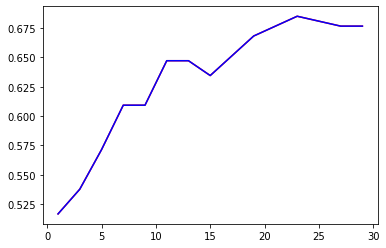

In [16]:
# Write your code here

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = list(range(1, 30, 2))

train_results2 = []
val_results_Knn = []
# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
    # Follow what we did in decision tree part
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train.values.ravel())
    
    # Evaluate on Training set
    train_pred2 =dt.predict(x_train) # One line of code
    train_acc2 =accuracy_score(y_train.values.ravel(),train_pred) # One line of code
    train_results2.append(train_acc)
   
  # Evaluate on Validation set
    val_predknn = model.predict(x_val)# One line of code 
    val_accknn = accuracy_score(y_val.values.ravel(),val_predknn)# One line of code
    val_results_Knn.append(val_accknn)
    
    score = model.score(x_val, y_val.values.ravel())
    print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
    accuracies.append(score)
import matplotlib.pyplot as plt

plt.plot(kVals, accuracies,'r')
plt.plot(kVals, val_results_Knn,'b')
plt.show()

In [17]:

# Train KNN using the full training data with the best K that you found
i = np.argmax(accuracies)
print("best k = %d with %.5f%% validation accuracy" % (kVals[i], accuracies[i] * 100))
model1 = KNeighborsClassifier(n_neighbors=kVals[i])
model1.fit(train_data, train_label.values.ravel())
predictions1 = model1.predict(test_data)

# Testing
from sklearn.metrics import accuracy_score
TestAcc = accuracy_score(test_label.values.ravel(), predictions1)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

best k = 23 with 68.48739% validation accuracy
Testing Accuracy = 70.04831%


# Bonus

# Apply gridsearch using decision tree on any hyperparameter(s) of your choice, you have to beat your previous obtained accuracies to get the bonus


In [33]:
# Write your code here
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

dt2=DecisionTreeClassifier()

#Tuning hyperparameters 
parametersD3 = {
              'criterion':['gini'],
              'max_depth':list(range(1,15,2)),
              'max_leaf_nodes':list(range(2,30)),
             }
acc_scorer = make_scorer(accuracy_score)


# Running the grid search
grid_obj = GridSearchCV(dt2, parametersD3, scoring=acc_scorer)
grid_obj = grid_obj.fit(train_data, train_label)

# Set the dt to the best combination of parameters
dt2=DecisionTreeClassifier()
dt2= grid_obj.best_estimator_
print(dt2)
# Fit the best algorithm to the data. 
dt2.fit(train_data,train_label)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
#testing dt with best parameters
predictions = dt2.predict(test_data)

print("************************************")
print("Testing Accuracy of Previous Decision Tree = %.5f%%" % (TestAccc * 100))

print("************************************")

print("After Grid Search Testing Accuracy = %.5f%% "%(accuracy_score(test_label, predictions)*100))
print("************************************")


************************************
Testing Accuracy of Previous Decision Tree = 71.49758%
************************************
After Grid Search Testing Accuracy = 73.42995% 
************************************


# Report: Write a summary of your approach to this problem; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what decision trees are, assuming they are known to people in your research area).

Must include statements such as:


*   Include the problem definition: 1-2 lines
*   Talk about train/val/test sets, size and how split.
*   State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data…."
*   Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)



# Write your report in this cell

REPORT
--------------------
**********************
The dataset contains 1000 entries with 20 categorical attributes. Each
entry represents a person who takes a credit by a bank. 

Task needed to be done is to classify a person as good or bad credit risks according to set of attributes.
In our data, training and testing  data were already given seperatly. We divided this training data again 70% for training and 30% for validation.

DECISION TREE CLASSIFIER 
**********
First we classified with Decision Tree Classifier with default parameters.
The result we obtain 67.63285% then we search for the Best Minimum Sample Split size
among an array 2 to 100. Best result we obtained here with the validation set was  0.7226890756302521 with Minimum Sample Split size = 51.

Then we trained our full training data Minimum Sample Split size = 51. We get the Testing Accuracy = 71.49758%. Which is an improvement after the result we obtained from default parametered Decision Tree.

KNN
**********
In addition to the decision tree we used KNN classifier. What we get first with default parameters is Testing Accuracy = 67.63285%. We improved it by trying different k numbers between 1 and 30.(Only the odd numbers between). We obtained the best results on validation set when k = 23 with 68.48739% validation accuracy.

Then we trained the whole training data with k=23 and we get the 
Testing Accuracy = 70.04831%

COMPLEXITIES
***********
Assuming N is the number of rows in training data and F is the number of  features(columns) in data. D is the depth of the tree. Depends on how balanced it is we have complexity for the DT. 

      Between  O(NF log(D)) AND O((N^2)F) 

For KNN, its complexity depends on the data,if we take data points as N we will have complexity.
      
        O(N^2)
In our case we have 1000 rows in total, approximately 800 rows our training data and 20 features and for DT, depth around 8.

Since our data is not a large data to study on, we won't have big speed differences.

For gridsearch we have tried 3 features on decision tree classifier. However we set criterion to Gini. We have O(N^2) complexity for grid search. 

BONUS PART
**********
For that part we need to get better results than the obtained before with different classifiers and parameters.
What we got from DTC was Testing Accuracy = 71.49758%.

What we got from KNN was Testing Accuracy = 70.04831%

By applying grid search on DTC we have obtained Testing Accuracy = 73.42995% 

On this Grid search we have only tried these three parameters between given ranges.

              'criterion':['gini'],
              'max_depth':list(range(1,15,2)),
              'max_leaf_nodes':list(range(2,30))

             
For information gain we tried Gini impurity instead of entropy and that resulted  in higher accuracy rate.
Best parameters we have obtained for this result are :
             
              criterion='gini'
              max_depth=7
              max_leaf_nodes=15

Hence we obtained a better result than the previous approaches with 
---------------------------------------------------------------------
Testing Accuracy = 73.42995% 
---------------------------------